<a href="https://colab.research.google.com/github/gbam-ds/FP-ML/blob/main/Porto_Seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Porto Seguro
##Getting data

see <a href="{https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/discussion/40222}">this discusion</a> about the data: 

In [ ]:
# Core
import seaborn as sns
#import pandas as pd
import numpy as np

# Visual
import matplotlib.pyplot as plt
import graphviz
import pprint

# Sklearn
from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#!pip install pandas==1.2.2
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

#train dataset
train_path = '/content/drive/MyDrive/porto-seguro-safe-driver-prediction/train.csv'
train_df = pd.read_csv(train_path)
df = train_df.copy()
df.head() 

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
#O lançador do desafio nos informa que toda missing data da base está como -1

#Optamos por substituir -1 para NaN 
df = df.replace(-1,{})

#id não ajuda, vou dropar
df.drop(['id'], axis=1, inplace=True)

#ps_car_03_cat e ps_car_05_cat tem muito nan, vou dropar
df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1, inplace = True)

#ps_reg_03 e ps_car_14 são continuas, vou preencher com média
df['ps_reg_03'].fillna((df['ps_reg_03'].mean()), inplace=True)
df['ps_car_14'].fillna((df['ps_car_14'].mean()), inplace=True)


#ps_car_07_cat, vou preencher com moda
df['ps_car_07_cat'] = df['ps_car_07_cat'].fillna(df['ps_car_07_cat'].mode()[0])


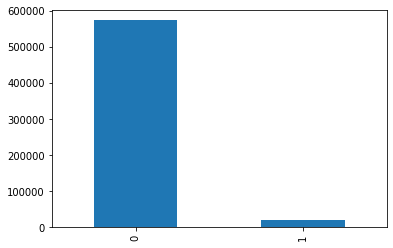

In [ ]:
#distribuição de target
df["target"].value_counts().plot(kind = 'bar');

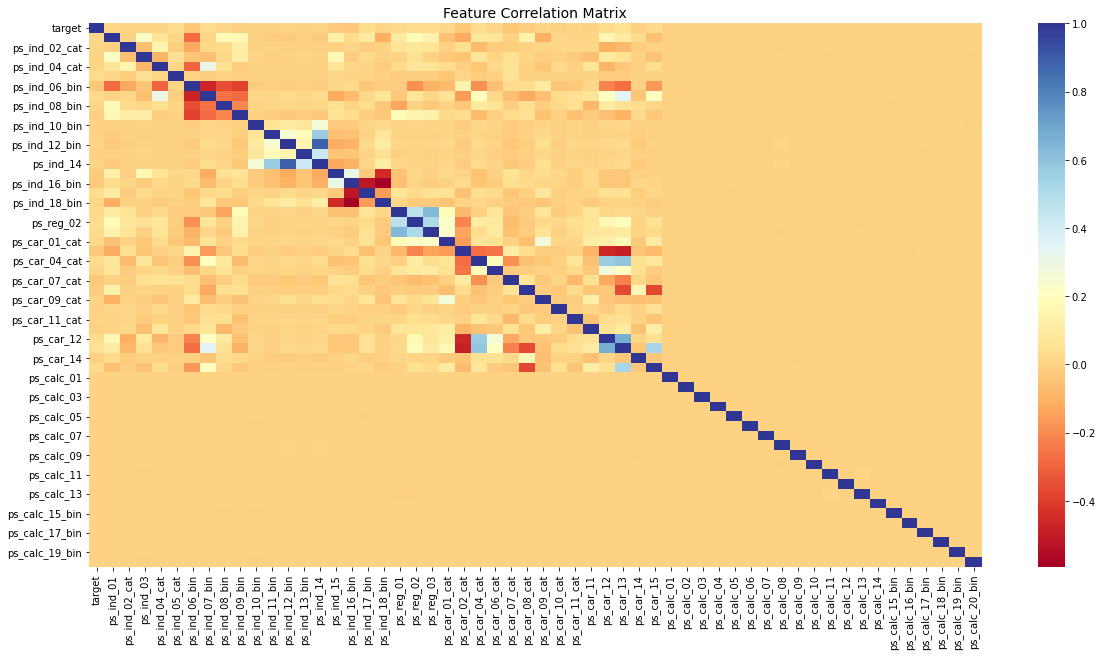

In [ ]:
#correlação das variáveis
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Ruim de visualizar os impactos porque (1) há baixo impacto e as cores são parecidas e (2) há muitas variáveis. No entanto, podemos ver que _calc não aparenta ter qualquer relação com qualquer variável, sendo cadidata ao drop.

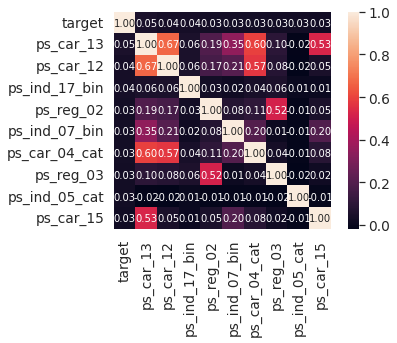

In [ ]:
#target correlation matrix

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Resampling

In [ ]:
labels = df.columns[1:]

X = df[labels]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Usando SMOTE resampler

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=7).fit_resample(X,y)
Counter(y_resampled)

Counter({0: 573518, 1: 573518})

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [ ]:
df_resampled = pd.concat((X_resampled,y_resampled))
df_resampled.shape

(2294072, 56)

In [ ]:
## plotar scatter plot de distribuição da y

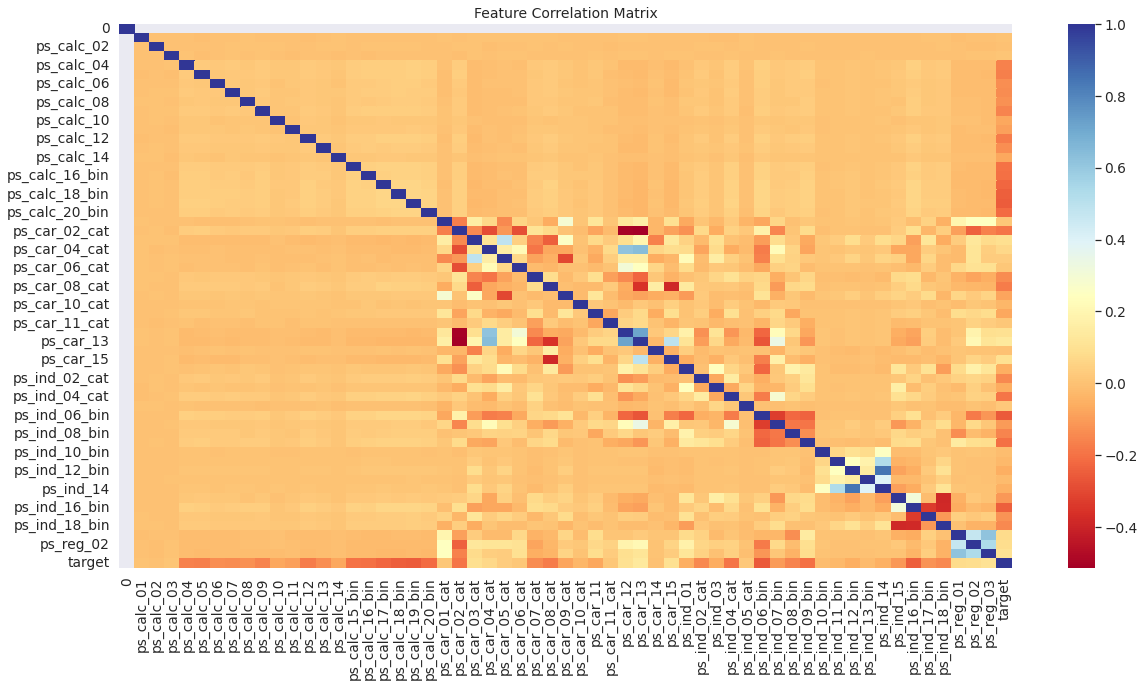

In [ ]:
#correlação das variáveis 
fig, ax = plt.subplots(figsize=(20,10)) 
corrmat = df_resampled.corr()
sns.heatmap(corrmat, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

Agora que a base está balanceada, _cal afeta target

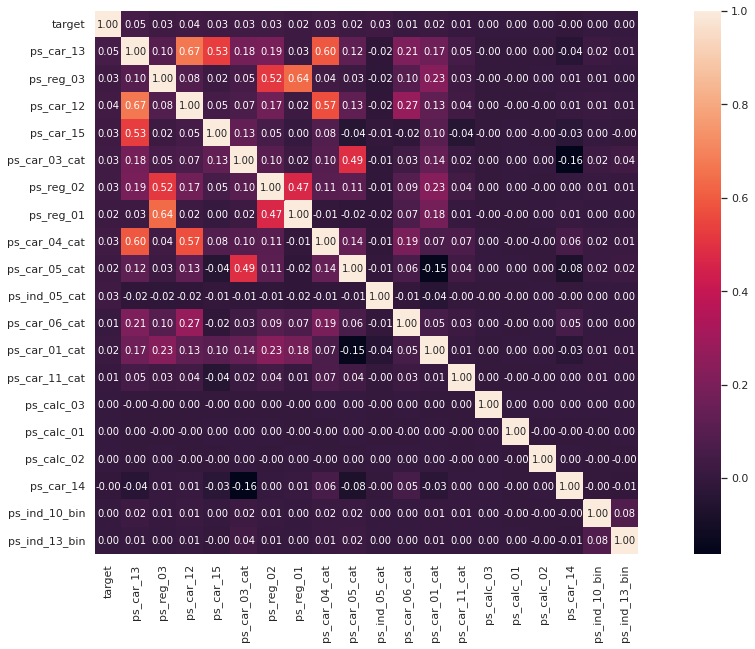

In [ ]:
#target correlation matrix

fig, ax = plt.subplots(figsize=(20,10))         


k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

feature engineering

In [ ]:
## filling NAN das categoricas com mode
#df_resampled['ps_car_01_cat'].fillna((df['ps_car_01_cat'].ffill()), inplace=True)

## filling NAN das binarias com mode
## filling NAN das outras com median

In [ ]:
#analisando a distribuição das outras
#sns.distplot(df_resampled['G3'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(dft_resampled['G3'], plot=plt)

In [ ]:
#normalization das "outras"
#z-

In [ ]:
# Removendo outliers
#Dropping the outlier rows with standard deviation
# n = 3
# for label, content in df_resampled.items():
#   upper_limit = df_resampled[label].mean() + n*df_resampled[label].std () 
#   lower_limit = df_resampled[label].mean() - n*df_resampled[label].std ()

  #   dft = df_resampled[(df_resampled[label] < upper_limit) & 
  #                      (df_resampled[label] > lower_limit)]  
  #return dft

modelando

In [ ]:
#separando
#labels = dft.columns[1:]

#X = dft[labels]
#y = dft['target']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#1 define parametro de acuracia
# confusion matrix

#2 define modelos

-


#analisando correlações - Nominal-Continuous


In [ ]:
from scipy import stats
stats.pointbiserialr(df_train["target"], df_train["ps_reg_03"])


In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_14"])


In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_12"])


analisando correlações - Nominal-Ordinal


In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_13"])


In [ ]:
stats.pointbiserialr(df_train["target"], df_train["ps_car_15"])


In [ ]:
#rank biserial
#pip3 install rbcde
#import rbcde


analisando correlações - Nominal-Nominal

In [ ]:
#phi/matthews correlation
matthews_corrcoef(df_train["target"], df_train["ps_car_01_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_02_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_04_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_06_cat"])

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(df_train["target"], df_train["ps_car_08_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_09_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_10_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_car_11_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_02_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_04_cat"])

In [ ]:
matthews_corrcoef(df_train["target"], df_train["ps_ind_05_cat"])

In [ ]:
#!pip install pandas-profiling

In [ ]:
#import pandas_profiling as pp
#prof = pp.ProfileReport(df_train)
#prof.to_file(output_file='output.html')

In [ ]:
#Verificando missing data
#missing = df_train.isnull().sum().sort_values(ascending=False)

#missing 

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = 100*(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Tem muito mais 0 do que 1, implicando em poucos casos de acionamento de seguro.
Discussão a respeito dos critérios da ponderação deve ser feita.

In [ ]:
# antes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_train.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

### não temos 'target' no eixo y -_-

In [ ]:
ints = df_train.select_dtypes(include = 'int64')

#Medir a correlação nos "ints"
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

intscorr = ints.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(intscorr, dtype=bool))

sns.heatmap(intscorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()



In [ ]:
floats = df_train.select_dtypes(include = 'float64')


In [ ]:
#Medir a correlação dos floats

floatscorr = floats.corr()

fig, ax = plt.subplots(figsize=(20,10))   

cmap = sns.diverging_palette(230, 20, n= 7, as_cmap=True)

mask = np.triu(np.ones_like(floatscorr, dtype=bool))

sns.heatmap(floatscorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df_train['target'], bins=2, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Target')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [ ]:
numeric_data = df_train.select_dtypes(include=[np.number])
categorical_data = df_train.select_dtypes(exclude=[np.number])

numeric_data.shape
categorical_data.shape

Por que não usamos o Tomak? 

- Como o tomak exclui outliers não é do nosso interesse aplicá-lo já que os nossos targets são outliers. 

In [ ]:
#No caso, não funcionou pois nossa amostra ultrapassa o limite de 10000 amostras (temos mais de 500.000) 

Etapas seguintes: 

1. Feature Engineering
*  Google Sheets


2. Método de resampling para Y

*   Undersampling: Cluster 
*   Oversampling: SMOTE
*   Mix: SMOTE + Cluster 


3. modeling

4. testing accuracy/error

*   accuracy_score
*   confusion matrix

Analisar a coluna (ver) + testar se tem missing + ver o nível de correlação (se tiver muitas NAN e baixo nível de correlação com a target = dropar )



In [ ]:
df_train["ps_ind_05_cat"].hist()

In [ ]:
corrmat = df_train.corr()
#target correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
corr_ps_car_07_cat = df_train['ps_car_09_cat'].corr(df_train['target'])

In [ ]:
corr_ps_ind_02_cat = df_train['ps_ind_02_cat'].corr(df_train['target'])